In [285]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

In [286]:
from sklearn import set_config
set_config(transform_output = "pandas")

In [287]:
df = pd.read_csv('datos.csv')

In [288]:
df

,StartDate,Type,CurrStreak,IsActive
0,2024-10-01,Health & Fitness,15,1
1,2024-10-02,Personal Development,8,1
2,2024-10-03,Productivity & Time Management,12,1
3,2024-10-04,Social & Relationships,3,0
4,2024-10-05,Financial Habits,7,0
5,2024-10-06,Environmental Impact,5,0
6,2024-10-07,Emotional Well-being,10,1
7,2024-10-08,Work & Career,2,0
8,2024-10-09,Creative & Hobbies,14,1
9,2024-10-10,Spirituality & Reflection,6,1


In [289]:
df["StartDate"] = pd.to_datetime(df["StartDate"])

In [290]:
X = df.drop(columns = ["IsActive"])
y = df["IsActive"]

In [291]:
X_train_num = X.select_dtypes(include = [int])
X_train_cat = pd.get_dummies(X.select_dtypes(include = [object]), drop_first = True, dtype = int)
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train_num)
X = pd.concat([X_train_std, X_train_cat], axis = 1)

In [292]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 33 entries, 0 to 32
Series name: IsActive
Non-Null Count  Dtype
--------------  -----
33 non-null     int64
dtypes: int64(1)
memory usage: 392.0 bytes


In [293]:
num_vars = X.select_dtypes(include = [float, int]).columns
cat_vars = X.select_dtypes(include = [object, "category"]).columns

In [294]:
enc = OneHotEncoder()
enc = enc.fit(X[cat_vars])
categories = enc.categories_

In [295]:
pre_processing = make_column_transformer((StandardScaler(), num_vars),
                                         (OneHotEncoder(categories = categories,
                                                        drop = "first"), cat_vars))

In [296]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 1234)

#Logistic Regression

In [297]:
mnr = LogisticRegression(multi_class='multinomial',penalty = None,max_iter=10000)

In [298]:
mnr_pipeline = make_pipeline(pre_processing, mnr)

In [299]:
mnr_pipeline = make_pipeline(pre_processing, mnr)
mnr_fitted = mnr_pipeline.fit(X_train, y_train)

C:\Users\crist\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(


In [300]:
mnr_fitted = mnr_pipeline.fit(X_train,y_train)

C:\Users\crist\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(


In [301]:
mnr_fitted.score(X_test, y_test)

0.7

In [302]:
mnr = LogisticRegression(multi_class='multinomial',max_iter=10000,penalty='l2')
mnr_pipeline = make_pipeline(pre_processing, mnr)
mnr_fitted = mnr_pipeline.fit(X_train,y_train)
mnr_fitted.score(X_test, y_test)

C:\Users\crist\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(


1.0

In [303]:
from joblib import dump, load

# Example: Create and train a model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Save the model to a file
dump(mnr_fitted, 'knn.joblib')
dump(pre_processing, 'scaler.joblib')

['scaler.joblib']

#KNN


In [279]:
from sklearn.neighbors import KNeighborsClassifier

In [280]:
X = df.drop(columns = ["IsActive"])

In [281]:
from sklearn import set_config
set_config(transform_output = "pandas")

In [282]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 1234)

In [283]:
k = np.sqrt(len(X_train))
knn = KNeighborsClassifier(n_neighbors = int(k))

In [ ]:
knn = knn.fit(X_train, y_train)

In [233]:
y_pred = knn.predict(X_test)

In [234]:
accuracy = (y_test == y_pred).mean()

In [235]:
accuracy

np.float64(0.9)

In [236]:
from joblib import dump, load

# Example: Create and train a model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Save the model to a file
dump(knn, 'knn.joblib')
dump(scaler, 'scaler.joblib')

['scaler.joblib']

#Random Forest

In [237]:
X = df.drop(columns = ["IsActive"])
X_train_num = X.select_dtypes(include = [int])
X_train_cat = pd.get_dummies(X.select_dtypes(include = [object]), drop_first = True, dtype = int)
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train_num)
X = pd.concat([X_train_std, X_train_cat], axis = 1)

In [238]:
from sklearn import set_config
set_config(transform_output = "pandas")

In [239]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 1234)

In [240]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

rfc.fit(X_train, y_train)

RandomForestClassifier()

In [241]:
y_pred = rfc.predict(X_test)

In [242]:
accuracy = (y_test == y_pred).mean()

In [243]:
accuracy

np.float64(0.8)

In [244]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score

In [245]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.67      1.00      0.80         4
           1       1.00      0.67      0.80         6

    accuracy                           0.80        10
   macro avg       0.83      0.83      0.80        10
weighted avg       0.87      0.80      0.80        10



In [246]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

Confusion matrix, without normalization
[[4 0]
 [2 4]]
Normalized confusion matrix
[[1.   0.  ]
 [0.33 0.67]]


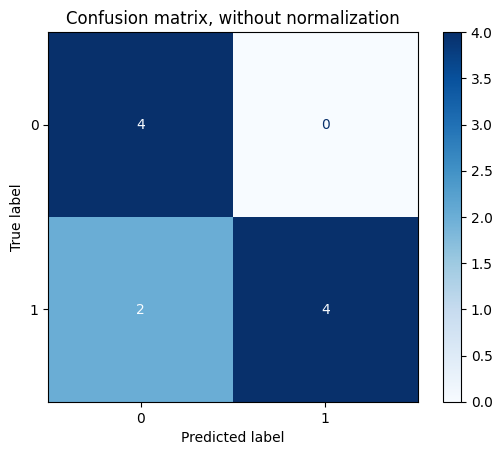

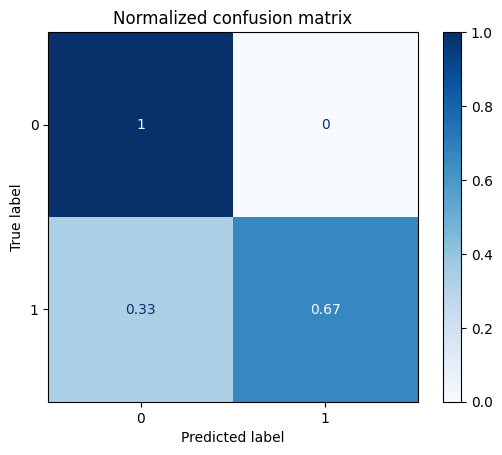

In [247]:
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        rfc,
        X_test,
        y_test,

        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [248]:
y_test.info()

<class 'pandas.core.series.Series'>
Index: 10 entries, 7 to 13
Series name: IsActive
Non-Null Count  Dtype
--------------  -----
10 non-null     int64
dtypes: int64(1)
memory usage: 160.0 bytes


#ADA BOOST

In [249]:
X = df.drop(columns = ["IsActive"])
X_train_num = X.select_dtypes(include = [int])
X_train_cat = pd.get_dummies(X.select_dtypes(include = [object]), drop_first = True, dtype = int)
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train_num)
X = pd.concat([X_train_std, X_train_cat], axis = 1)

In [250]:
from sklearn import set_config
set_config(transform_output = "pandas")

In [251]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 1234)

In [252]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier(n_estimators=3)

In [253]:
model.fit(X_train,y_train)

C:\Users\crist\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(n_estimators=3)

In [254]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score

In [255]:
predictions = model.predict(X_test)

In [256]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.67      1.00      0.80         4
           1       1.00      0.67      0.80         6

    accuracy                           0.80        10
   macro avg       0.83      0.83      0.80        10
weighted avg       0.87      0.80      0.80        10



#SVC

In [257]:
X = df.drop(columns = ["IsActive"])
X_train_num = X.select_dtypes(include = [int])
X_train_cat = pd.get_dummies(X.select_dtypes(include = [object]), drop_first = True, dtype = int)
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train_num)
X = pd.concat([X_train_std, X_train_cat], axis = 1)

In [258]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 1234)

In [259]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

In [260]:
clf.score(X_test, y_test)

0.7